In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [55]:
n_pts = 500
centers = [[-1,1], [-1, -1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
# print(X)
# print(y)

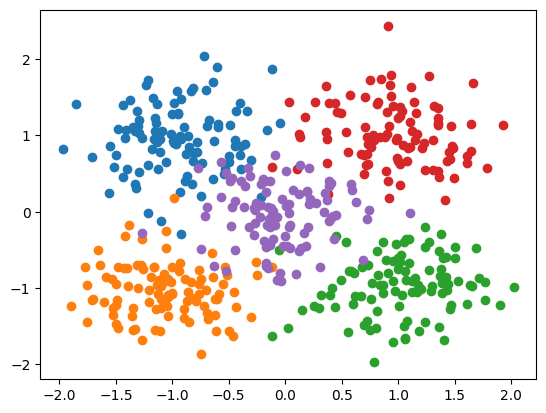

In [48]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1] )
plt.scatter(X[y==2, 0], X[y==2, 1] )
plt.scatter(X[y==3, 0], X[y==3, 1] )
plt.scatter(X[y==4, 0], X[y==4, 1] )

In [49]:
# one hot encoding
print(y)
y_cat = to_categorical(y, 5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [50]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax')) # 2 inputs (x,y coords) and 3 outputs (labels)
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1736 - accuracy: 0.5300
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.8380
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.9060
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.9320
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.9440
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9440
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2426 - accuracy: 0.9520
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.9540
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9500
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9440
Epoch 11/

79/79 [==============================] - 0s 1ms/step


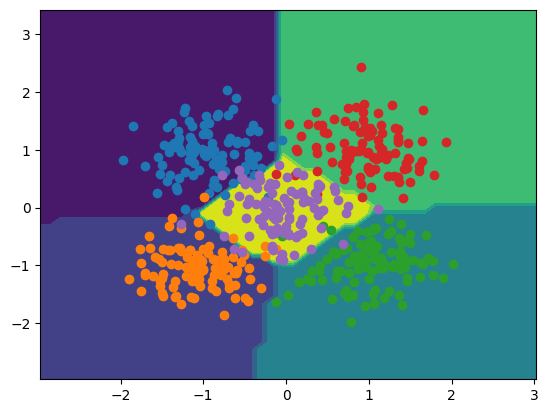

In [52]:
def plot_multiclass_decision_boundary(X, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = np.argmax(model.predict(grid), axis=-1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

plot_multiclass_decision_boundary(X, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1] )
plt.scatter(X[y==2, 0], X[y==2, 1] )
plt.scatter(X[y==3, 0], X[y==3, 1] )
plt.scatter(X[y==4, 0], X[y==4, 1] )

1/1 [==============================] - 0s 22ms/step
Prediction is  4


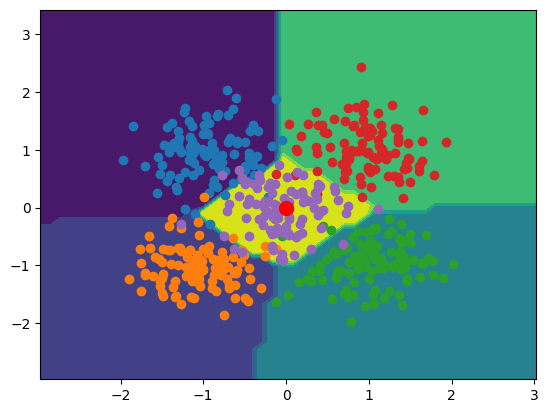

In [56]:
plot_multiclass_decision_boundary(X, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1] )
plt.scatter(X[y==2, 0], X[y==2, 1] )
plt.scatter(X[y==3, 0], X[y==3, 1] )
plt.scatter(X[y==4, 0], X[y==4, 1] )
x = 0
y = 0
point=np.array([[x,y]])
prediction = np.argmax(model.predict(point))
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction is ", prediction)